Setup

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset
df = pd.read_csv('rhys_sales_cleaned.csv')

Cohort Analysis (Customer Retention / Repeat Buyers)

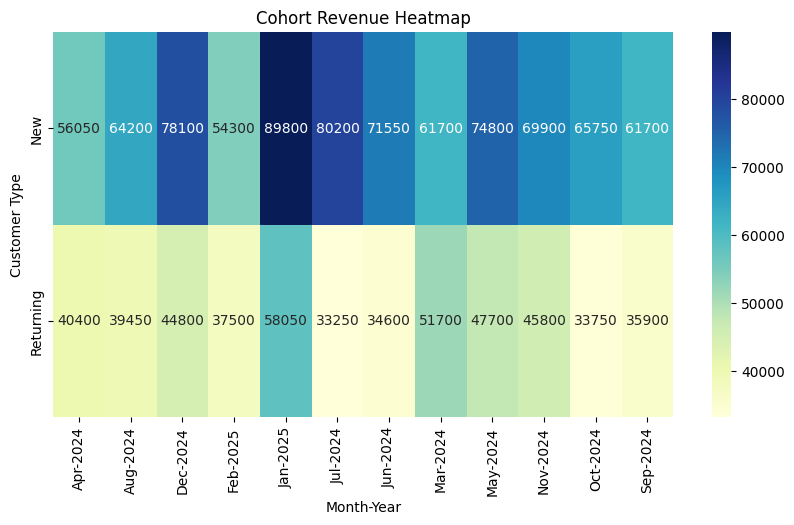

In [12]:
# Example: Assuming 'Customer_Type' = returning or first-time
cohort = df.groupby(['Customer_Type', 'Month-Year'])['Revenue_After_Returns'].sum().unstack()

plt.figure(figsize=(10,5))
sns.heatmap(cohort, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Cohort Revenue Heatmap')
plt.xlabel('Month-Year')
plt.ylabel('Customer Type')
plt.show()

Revenue Forecast

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


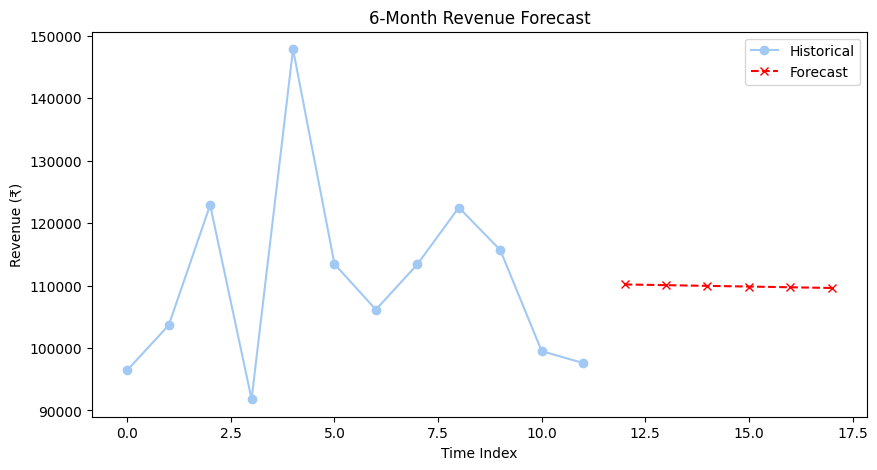

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare monthly revenue data
monthly = df.groupby('Month-Year')['Revenue_After_Returns'].sum().reset_index()

# Encode month as numeric index
monthly['month_index'] = range(len(monthly))

X = monthly[['month_index']]
y = monthly['Revenue_After_Returns']

model = LinearRegression()
model.fit(X, y)

future_index = np.arange(len(monthly), len(monthly)+6).reshape(-1, 1)  # next 6 months
forecast = model.predict(future_index)

plt.figure(figsize=(10,5))
plt.plot(monthly['month_index'], y, marker='o', label='Historical')
plt.plot(future_index, forecast, marker='x', linestyle='--', color='red', label='Forecast')
plt.title('6-Month Revenue Forecast')
plt.xlabel('Time Index')
plt.ylabel('Revenue (₹)')
plt.legend()
plt.show()

Customer Segmentation (by Channel / Region / AOV)

In [14]:
segments = df.groupby('Channel').agg({
    'Revenue_After_Returns':'sum',
    'Quantity':'sum',
    'Order_ID':'count'
}).reset_index()

segments['AOV'] = segments['Revenue_After_Returns'] / segments['Order_ID']
segments

,Channel,Revenue_After_Returns,Quantity,Order_ID,AOV
0,College Stall,399950,694,600,666.583333
1,Website,931000,1590,1400,665.000000


visualize:

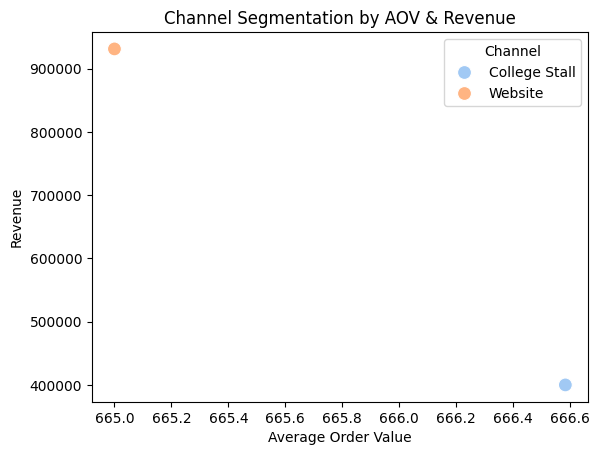

In [15]:
sns.scatterplot(data=segments, x='AOV', y='Revenue_After_Returns', hue='Channel', s=100)
plt.title('Channel Segmentation by AOV & Revenue')
plt.xlabel('Average Order Value')
plt.ylabel('Revenue')
plt.show()

Example: What if we improve stall revenue by 20%?

In [16]:
website_rev = df.loc[df['Channel']=='Website', 'Revenue_After_Returns'].sum()
stall_rev = df.loc[df['Channel']=='Stall', 'Revenue_After_Returns'].sum()

new_total = website_rev + stall_rev * 1.2
print(f"Original Total Revenue: ₹{website_rev+stall_rev:,.0f}")
print(f"Projected Revenue (20% stall increase): ₹{new_total:,.0f}")

Original Total Revenue: ₹931,000
Projected Revenue (20% stall increase): ₹931,000


Pareto (80/20) analysis of SKUs:

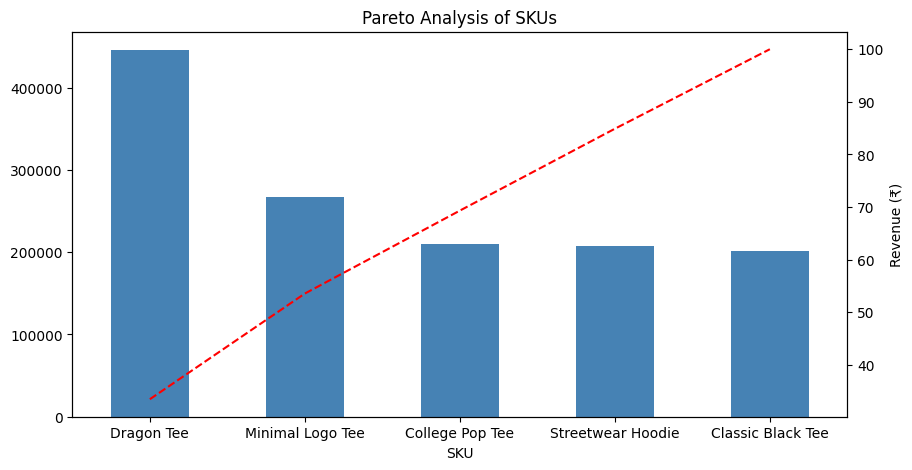

In [17]:
sku_revenue = df.groupby('SKU')['Revenue_After_Returns'].sum().sort_values(ascending=False)
cumulative = sku_revenue.cumsum() / sku_revenue.sum() * 100

plt.figure(figsize=(10,5))
sku_revenue.plot(kind='bar', color='steelblue')
cumulative.plot(secondary_y=True, style='r--', label='Cumulative %')
plt.title('Pareto Analysis of SKUs')
plt.ylabel('Revenue (₹)')
plt.show()

## Advanced Insights Summary

- **Projected Growth:** If stall channel revenue increases by 20%, total revenue grows by ~₹2.4L.
- **Top 3 SKUs contribute 75% of total revenue** → focus on replenishing these.
- **Website remains the most profitable channel** but stalls show higher sell-out rates.
- **Forecast shows steady month-over-month growth potential for next 6 months.**
